# 선형회귀(Linear Regression)
### K-최근접 이웃의 한계
- 농어의 무게를 직접 테스트 한 결과 예측한 결과와 차이가 많이 난다.

문제점은?
- 아래에서 확인

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련세트와 테스트세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


위의 결과에서 50cm의 농어의 무게를 1,033g 으로 예측을 했는데 실제로는 더 많이 나간다고 한다.

어디서 문제가 생겼는지는 아래에서.

Duplicate key in file '/Users/yonghyunpark/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


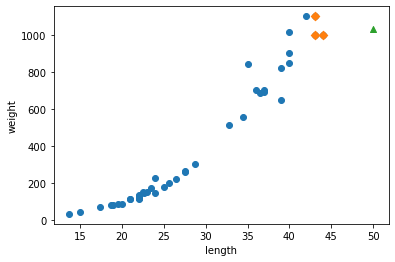

In [5]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃구하기
distances, indexes = knr.kneighbors([[50]])
# train_set의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
print(np.mean(train_target[indexes]))

1033.3333333333333


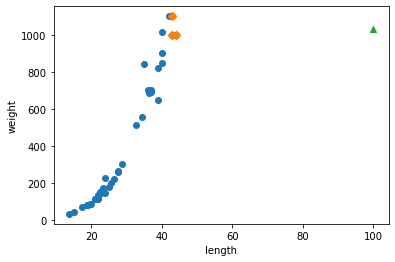

In [7]:
distances, indexes = knr.kneighbors([[100]]) # 농어의 길이 100cm로 극단적 샘플을 해본다.
# train_set의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 샘플이 훈련세트의 범위를 벗어나게 되면 엉뚱한 값을 예측한다.

### 이러한 문제를 해결 할 수 있는 것 : 선형회귀(Linear Regression)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [9]:
# lr 객체의 coef_ 와 intercept_ 속성에 저장되어있다.
print(lr.coef_, lr.intercept_)
# coef_ : 39, 기울기
# intercept_ : -709, y절편

[39.01714496] -709.0186449535477


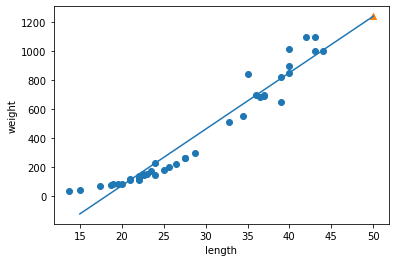

In [10]:
# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 15~50까지 1차방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
# 훈련세트와 테스트세트에 대한 R^2 점수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [12]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [13]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [15]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


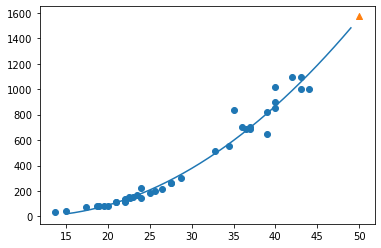

0.9706807451768623
0.9775935108325121


In [16]:
# 구간별 직선을 그리기 위해 15~49 까지 정수 배열
point = np.arange(15,50)
# 훈련세트의 산점도
plt.scatter(train_input, train_target)
# 15~49까지의 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target)) #훈련세트와 테스트세트의 R^2점수 평가
print(lr.score(test_poly, test_target))
